<a href="https://colab.research.google.com/github/sarajay19/T5_W5/blob/main/Time_Series_Forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Time Series Forecasting Exam

In this exam, you will work on a time series forecasting task. The goal is to go through the entire workflow from loading the data to evaluating the model and making predictions. Follow each step carefully. The dataset is stored in you can access it [here](https://www.kaggle.com/datasets/khaledzsa/traffic-dataset), the target is to predict `traffic_volume` column. There is also command to download the dataset below.

## Dataset: Traffic Dataset

### Dataset Overview:

- **Name**: Traffic Dataset
- **Description**: This dataset contains hourly data on the traffic volume for westbound I-94, a major interstate highway in the US that connects Minneapolis and St Paul, Minnesota. The data was collected by the Minnesota Department of Transportation (MnDOT) from 2012 to 2018 at a station roughly midway between the two cities.
- **Time Period**: Starting from 18-11-2016
- **Frequency**: Hourly observations

### Features:

1. **temp:** a numeric variable that shows the average temperature in kelvin.
2. **rain_1h:** a numeric variable that shows the amount of rain in mm that occurred in the hour.
3. **snow_1h:** a numeric variable that shows the amount of snow in mm that occurred in the hour.
4. **clouds_all:** a numeric variable that shows the percentage of cloud cover.
5. **weather_main:** a categorical variable that gives a short textual description of the current weather (such as Clear, Clouds, Rain, etc.).
6. **weather_description:** a categorical variable that gives a longer textual description of the current weather (such as light rain, overcast clouds, etc.).
7. **date_time:** a datetime variable that shows the hour of the data collected in local CST time.
8. **traffic_volume:** a numeric variable that shows the hourly I-94 reported westbound traffic volume.

#### Feel free to add or rearrange steps as you see fit to optimize your workflow. One additional note: the model's performance doesn't need to be 100% accurate. Instead, focus on achieving the best possible results while balancing performance and generalization.

## Load the Data

Load the time series dataset into a pandas DataFrame.

**Instructions:**
- Use `pandas` to load your dataset.
- Display the first few rows to understand its structure.
- Make sure the datetime column is correctly parsed.

In [3]:
# Here is a helping code that will download and unzip the dataset for you.
# Once you download the dataset you may comment the code!
!kaggle datasets download -d khaledzsa/traffic-dataset
!unzip traffic-dataset.zip

Dataset URL: https://www.kaggle.com/datasets/khaledzsa/traffic-dataset
License(s): unknown
  0% 0.00/235k [00:00<?, ?B/s]
100% 235k/235k [00:00<00:00, 126MB/s]
Archive:  traffic-dataset.zip
  inflating: Traffic Data.csv        


In [4]:
# basic libraries
import numpy as np
import pandas as pd

# for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# for model training
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [5]:
# load the dataset
df = pd.read_csv('/content/Traffic Data.csv', parse_dates=['date_time'])

In [6]:
# import first 5 rows
df.head()

,traffic_volume,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time
0,1209.0,291.15,0.0,0.0,90,Mist,mist,2017-08-27 01:00:00
1,1248.0,286.01,0.0,0.0,1,Clear,sky is clear,2018-09-06 23:00:00
2,4602.0,293.69,0.0,0.0,75,Clouds,broken clouds,2017-08-25 18:00:00
3,2838.0,262.35,0.0,0.0,1,Clear,sky is clear,2017-11-09 22:00:00
4,5794.0,267.08,0.0,0.0,5,Clear,sky is clear,2017-11-09 15:00:00


In [7]:
# import last 5 rows
df.tail()

,traffic_volume,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time
19995,2723.0,296.42,0.0,0.0,40,Clouds,scattered clouds,2018-06-06 21:00:00
19996,5895.0,285.58,0.0,0.0,40,Clouds,scattered clouds,2017-10-25 15:00:00
19997,1132.0,275.30,0.0,0.0,1,Clear,sky is clear,2018-03-28 23:00:00
19998,5525.0,260.94,0.0,0.0,75,Clouds,broken clouds,2018-02-12 15:00:00
19999,5042.0,301.65,0.0,0.0,40,Clouds,scattered clouds,2018-05-31 18:00:00


In [8]:
# sort the data values by th date_time column
df = df.sort_values(by='date_time')

In [9]:
df.head()

,traffic_volume,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time
7745,4872.0,274.08,0.0,0.0,90,Snow,heavy snow,2016-11-18 15:00:00
4628,4872.0,274.08,0.0,0.0,90,Fog,fog,2016-11-18 15:00:00
14496,4872.0,274.08,0.0,0.0,90,Mist,mist,2016-11-18 15:00:00
8867,5074.0,273.84,0.0,0.0,90,Fog,fog,2016-11-18 16:00:00
3867,5074.0,273.84,0.0,0.0,90,Mist,mist,2016-11-18 16:00:00


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20000 entries, 7745 to 3795
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   traffic_volume       19980 non-null  float64       
 1   temp                 20000 non-null  float64       
 2   rain_1h              20000 non-null  float64       
 3   snow_1h              20000 non-null  float64       
 4   clouds_all           20000 non-null  int64         
 5   weather_main         20000 non-null  object        
 6   weather_description  20000 non-null  object        
 7   date_time            20000 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(4), int64(1), object(2)
memory usage: 1.4+ MB


In [11]:
# statistics of the numrecial columns
df.describe().T

,count,mean,min,25%,50%,75%,max,std
traffic_volume,19980.0,3278.186887,113.0,1228.75,3430.0,4928.0,16781.0,1977.171357
temp,20000.0,281.16268,243.39,271.95,281.825,291.84,310.07,12.661288
rain_1h,20000.0,0.048395,0.0,0.0,0.0,0.0,10.6,0.398007
snow_1h,20000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
clouds_all,20000.0,49.3846,0.0,1.0,75.0,90.0,92.0,39.647341
date_time,20000,2017-10-22 04:13:17.939999744,2016-11-18 15:00:00,2017-04-30 14:45:00,2017-10-21 07:30:00,2018-04-13 21:00:00,2018-09-30 23:00:00,NaN


In [12]:
df.shape

(20000, 8)

In [13]:
df['date_time'].sample(5)

,date_time
10913,2018-09-21 00:00:00
17806,2017-01-21 17:00:00
1331,2018-09-04 04:00:00
15432,2017-04-30 10:00:00
14362,2017-06-20 07:00:00


In [14]:
# checking the start and end date
start_date, end_date = df['date_time'].min(), df['date_time'].max()
print(f'The start time:{start_date} - The end time: {end_date}')

The start time:2016-11-18 15:00:00 - The end time: 2018-09-30 23:00:00


In [15]:
# trying to understand the benefits of each column
df['weather_description'].value_counts()

,count
weather_description,
sky is clear,5514
mist,2758
overcast clouds,1738
broken clouds,1574
scattered clouds,1458
light snow,1247
light rain,1201
moderate rain,747
haze,672


In [16]:
df['weather_main'].value_counts()

,count
weather_main,
Clear,5614
Clouds,5234
Mist,2758
Rain,2244
Snow,1462
Drizzle,993
Haze,672
Thunderstorm,542
Fog,478


## Exploratory Data Analysis (EDA)

Perform exploratory data analysis on the dataset.

**Instructions:**
- Plot the time series data.
- Analyze trends, seasonality, and potential outliers.
- Plot boxplots or scatter plots to identify any outliers or anomalies in the data.
- Seasonal Decomposition: Use `seasonal_decompose` from the `statsmodels` library to break down the time series data into trend, seasonality, and residual components. Analyze each component to gain insights into the long-term movement (trend), regular patterns (seasonality), and remaining fluctuations (residuals).

Do more if needed!

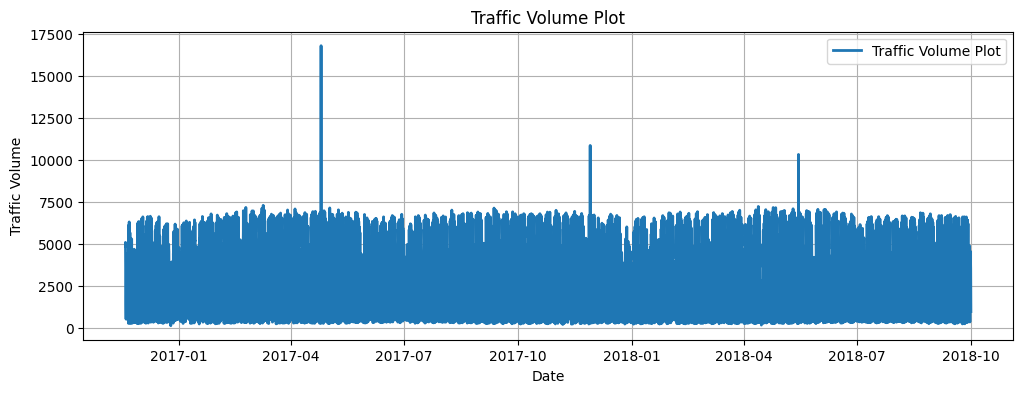

In [17]:
plt.figure(figsize=(12, 4))

# plot the dataset where x= date_time column and y= traffic_volume column
plt.plot(
    df['date_time'],
    df['traffic_volume'],
    label='Traffic Volume Plot', linewidth=2)

plt.title('Traffic Volume Plot')
plt.xlabel('Date')
plt.ylabel('Traffic Volume')
plt.xticks(rotation=0)
plt.legend()
plt.grid(True)
plt.show()

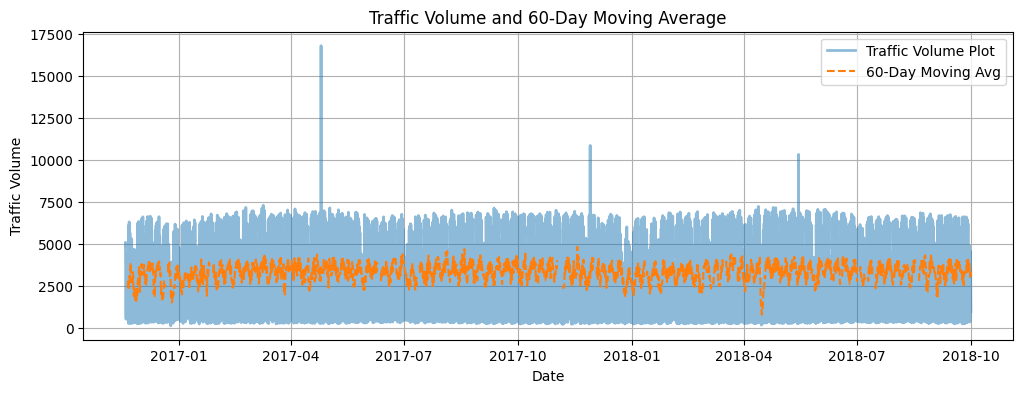

In [18]:
plt.figure(figsize=(12, 4))

# taken from the prev visualtion
plt.plot(
    df['date_time'],
    df['traffic_volume'],
    label='Traffic Volume Plot', linewidth=2, alpha=0.5)

# ploting moving average
window = 60 # for 30 days Avg
plt.plot(
    df['date_time'],
    df['traffic_volume'].rolling(window=window).mean(),
    label=f'{window}-Day Moving Avg', linestyle='--', linewidth=1.5)

plt.title(f'Traffic Volume and {window}-Day Moving Average')
plt.xlabel('Date')
plt.ylabel('Traffic Volume')
plt.xticks(rotation=0)
plt.legend()
plt.grid(True)
plt.show()

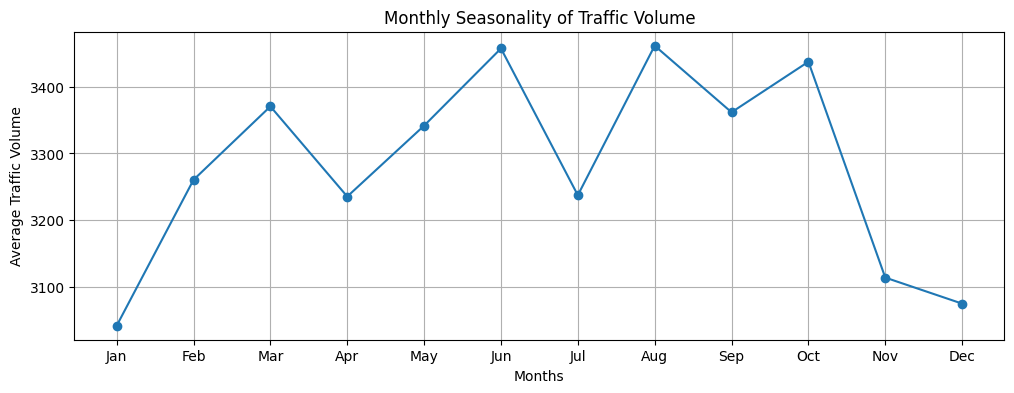

In [19]:
# monthly seasonalaty of traffic volume
df['Month'] = df['date_time'].dt.month

# group by the average of traffic volum in months
monthly_average = df.groupby('Month')['traffic_volume'].mean()

plt.figure(figsize=(12, 4)) # setting size of the figure

plt.plot(
    monthly_average.index,  # x-axis
    monthly_average.values, # y-axis
    marker='o') # for the dots points

plt.title(f'Monthly Seasonality of Traffic Volume')
plt.xlabel('Months')
plt.ylabel('Average Traffic Volume')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True)
plt.show()

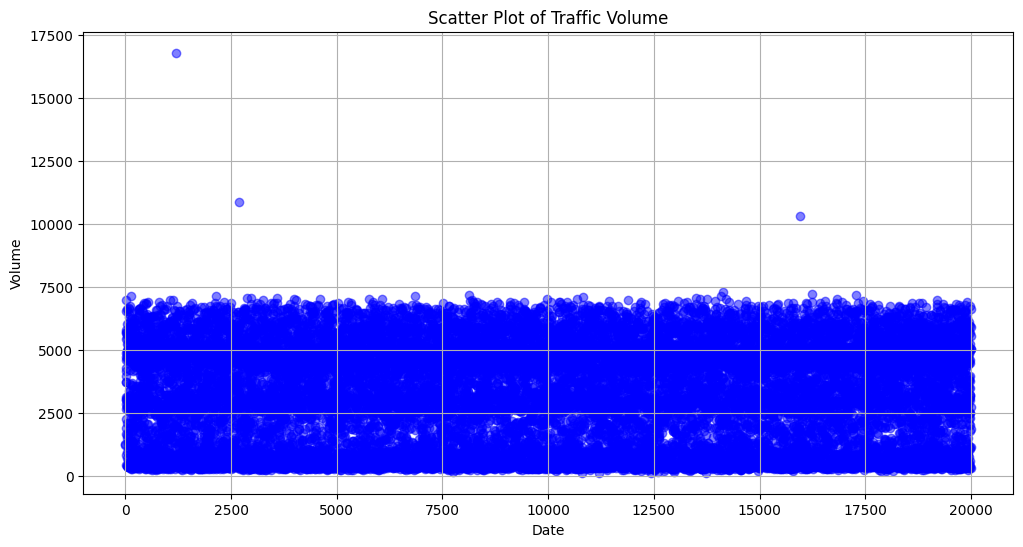

In [20]:
# create scatter plots can help visualize data points that deviate significantly from the trend.
plt.figure(figsize=(12, 6))
plt.scatter(df.index, df['traffic_volume'], color='blue', alpha=0.5)
plt.title('Scatter Plot of Traffic Volume')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.grid()
plt.show()


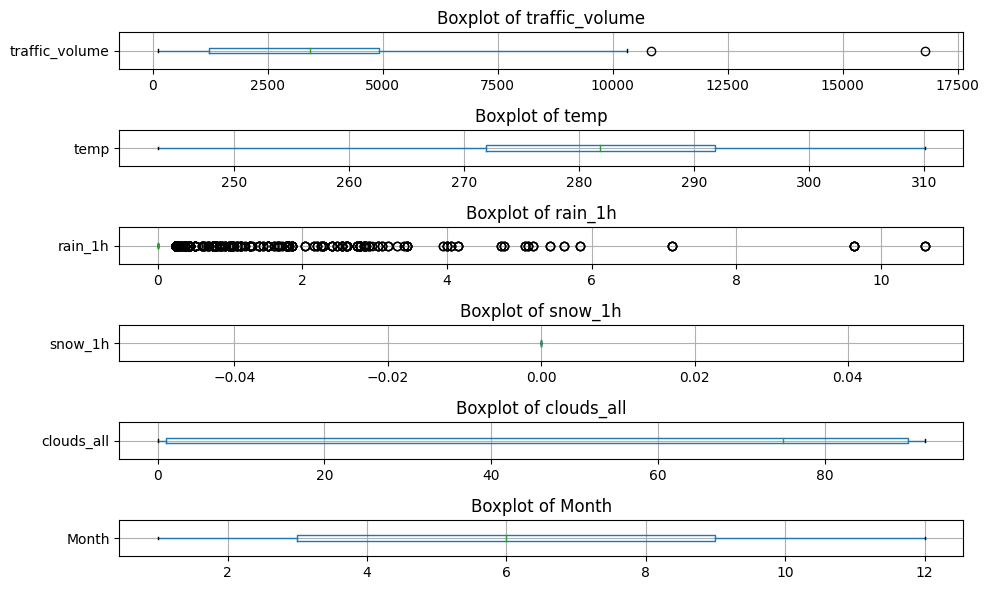

In [21]:
# set up the perfect size again
plt.figure(figsize=(10, 6))

# loop through each column in df and create a boxplot
for i, column in enumerate(df.select_dtypes(include='number').columns):
    plt.subplot(len(df.select_dtypes(include='number').columns), 1, i + 1)
    df.boxplot(column=column, vert=False)
    plt.title(f'Boxplot of {column}')
plt.tight_layout()
plt.show()

In [22]:
df.columns

Index(['traffic_volume', 'temp', 'rain_1h', 'snow_1h', 'clouds_all',
       'weather_main', 'weather_description', 'date_time', 'Month'],
      dtype='object')

In [23]:
# here i tried to impute outliers with median of the column rain_1h but somehow it didn't worked
# median = df['rain_1h'].median()
# df.loc[(df['rain_1h'] < (Q1 - 1.5 * IQR)) | (df['rain_1h'] > (Q3 + 1.5 * IQR)), 'rain_1h'] = median

In [24]:
# calculate Q1 (25) and Q3 (75)
Q1 = df['rain_1h'].quantile(0.25)
Q3 = df['rain_1h'].quantile(0.75)
IQR = Q3 - Q1

# identify outliers
outliers = df[(df['rain_1h'] < (Q1 - 1.5 * IQR)) | (df['rain_1h'] > (Q3 + 1.5 * IQR))]

# capping the outliers
df['rain_1h'] = df['rain_1h'].clip(lower=Q1 - 1.5 * IQR, upper=Q3 + 1.5 * IQR)


In [25]:
# same with other columns with outliers
Q1 = df['traffic_volume'].quantile(0.25)
Q3 = df['traffic_volume'].quantile(0.75)
IQR = Q3 - Q1

outliers = df[(df['traffic_volume'] < (Q1 - 1.5 * IQR)) | (df['traffic_volume'] > (Q3 + 1.5 * IQR))]

df['traffic_volume'] = df['traffic_volume'].clip(lower=Q1 - 1.5 * IQR, upper=Q3 + 1.5 * IQR)


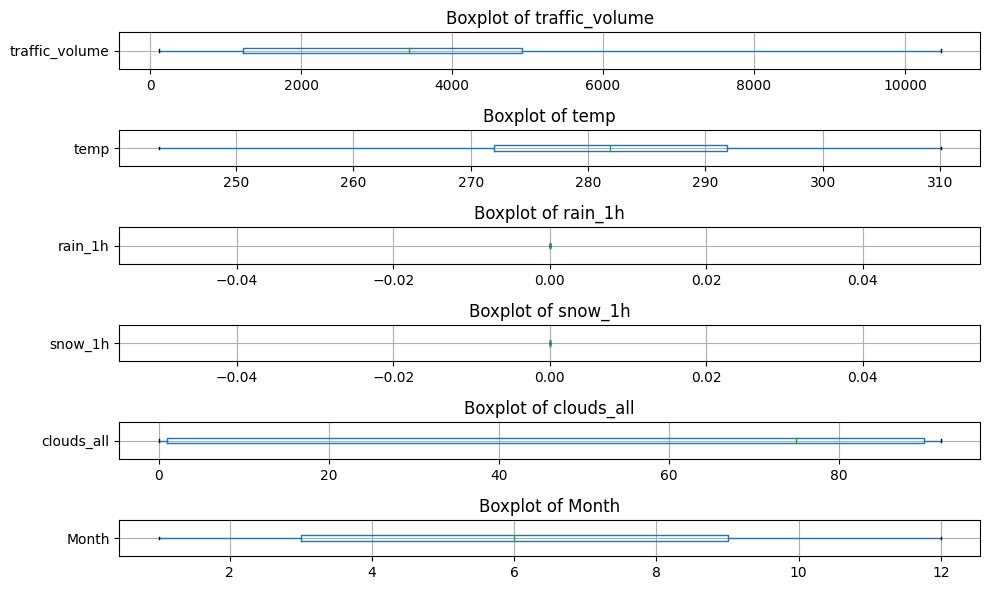

In [26]:
# create boxplot again for the columns in df
plt.figure(figsize=(10, 6))

for i, column in enumerate(df.select_dtypes(include='number').columns):
    plt.subplot(len(df.select_dtypes(include='number').columns), 1, i + 1)
    df.boxplot(column=column, vert=False)
    plt.title(f'Boxplot of {column}')
plt.tight_layout()
plt.show()

In [27]:
# checking which column i need to handle and which one to drop
df['snow_1h'].sample(5)

,snow_1h
9443,0.0
8334,0.0
8596,0.0
4626,0.0
18334,0.0


In [28]:
df[['rain_1h', 'snow_1h']].sample(5)

,rain_1h,snow_1h
15323,0.0,0.0
11752,0.0,0.0
10679,0.0,0.0
10217,0.0,0.0
1444,0.0,0.0


In [29]:
# as i look at the boxplot, checking the sample and value counts i relize there is no use of these columns and it will add nothing as they all have values of 0.0 entire the df
df[['snow_1h', 'rain_1h']].value_counts()

,,count
snow_1h,rain_1h,
0.0,0.0,20000


In [30]:
df = df.drop(['rain_1h'], axis=1)
df = df.drop(['snow_1h'], axis=1)

In [31]:
# the weather_description and weather_main columns serve the same purpose and keeping the description will run out the exceded power for no use
df[['weather_description', 'weather_main']].head()

,weather_description,weather_main
7745,heavy snow,Snow
4628,fog,Fog
14496,mist,Mist
8867,fog,Fog
3867,mist,Mist


In [32]:
# drop or delete the weather_description column from th df
df = df.drop(['weather_description'], axis=1)

In [33]:
df.columns

Index(['traffic_volume', 'temp', 'clouds_all', 'weather_main', 'date_time',
       'Month'],
      dtype='object')

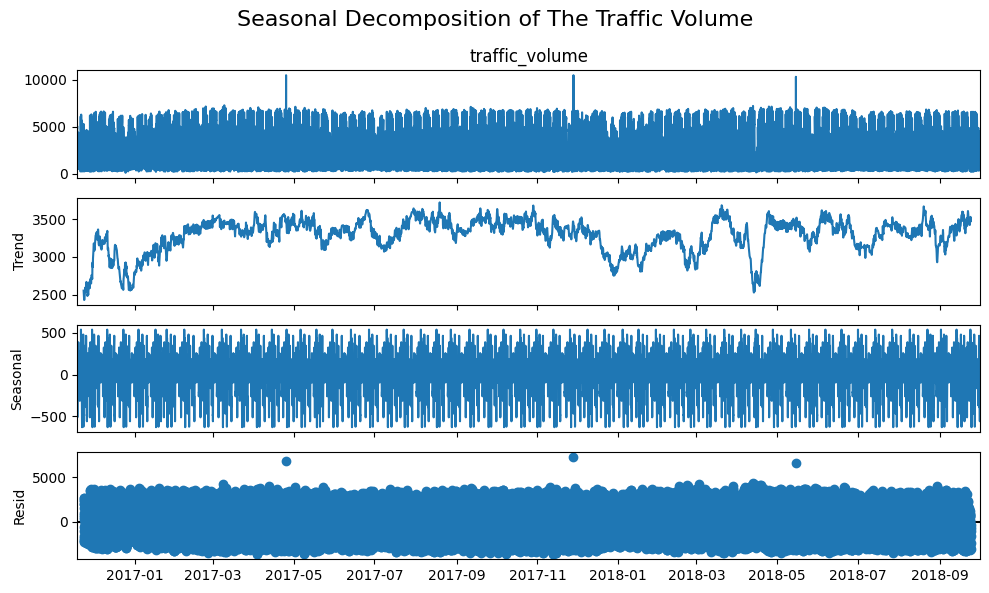

In [34]:
date_index = df.set_index('date_time')

# we create seasonal decomposition to reveals regular patterns that repeat annually throught the datetime
from statsmodels.tsa.seasonal import seasonal_decompose

# Decompose the time series
decomposition = seasonal_decompose(date_index['traffic_volume'].dropna(), model='additive', period=365) # daily pattern

# Plotting
fig = decomposition.plot() # sign the decomposition to the figure
fig.set_size_inches(10, 6) # size in inches for the whole figure and its element
plt.suptitle('Seasonal Decomposition of The Traffic Volume', fontsize=16)
plt.tight_layout()  # here i added the tight_layout to adjust layout
plt.show()

<Axes: ylabel='Frequency'>

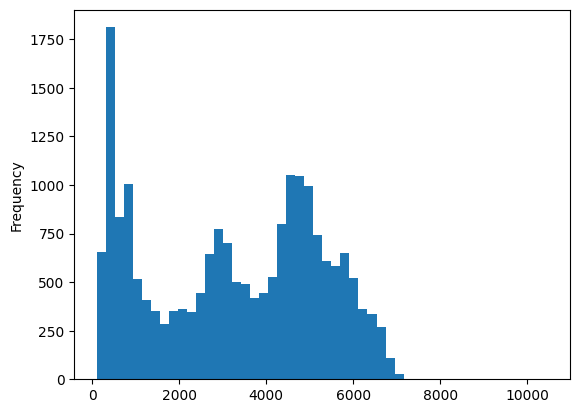

In [35]:
# just extra visualization to show the disturbtion of the traffic volum column
df['traffic_volume'].plot.hist(bins=50)

<Axes: xlabel='date_time'>

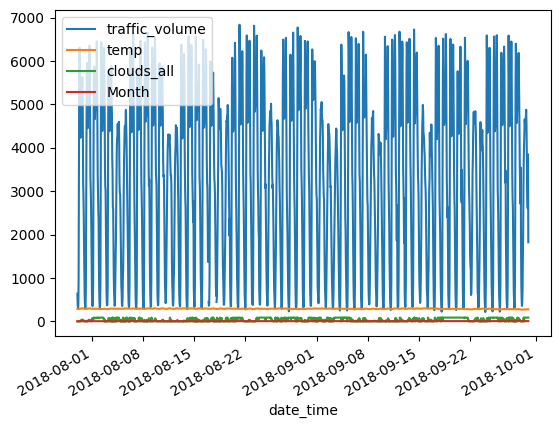

In [36]:
date_index = df.set_index('date_time')
date_index['2018-07-30 00:00':'2018-09-30 00:00'].plot()

## Data Preprocessing

Clean and preprocess the data.

**Instructions:**
- Handle any missing values in the dataset.
- If necessary, resample the data to ensure consistent time intervals.
- Create any additional features needed, such as lags or moving averages.
- Make sure that the dates are sorted correctly.

Do more if needed!

In [37]:
df.duplicated().sum()

12

In [38]:
df = df.drop_duplicates()

In [39]:
df[df.select_dtypes(include='object').columns] = df.select_dtypes(include='object').replace('NaN', '')

<ipython-input-39-a5cced344026>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[df.select_dtypes(include='object').columns] = df.select_dtypes(include='object').replace('NaN', '')


<Axes: >

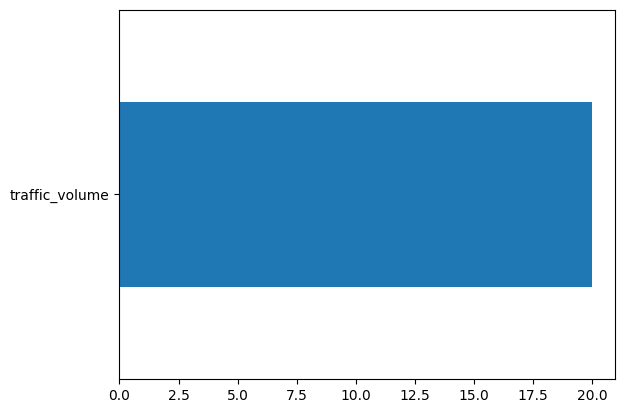

In [40]:
missing_per = df.isna().sum().sort_values(ascending = False)
missing_per[missing_per !=0].plot(kind="barh")

In [41]:
df.isnull().sum()

,0
traffic_volume,20
temp,0
clouds_all,0
weather_main,0
date_time,0
Month,0


In [42]:
# handling the missing values by using the method ffill which will fill the values by propagating the last valid observation to next valid
df.fillna(method='ffill', inplace=True)
df.isnull().sum()

<ipython-input-42-59efd4212ecb>:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


,0
traffic_volume,0
temp,0
clouds_all,0
weather_main,0
date_time,0
Month,0


In [43]:
# her i resampled the data by month from the date_index which is date_time column and taken the mean of thetraffic_volume
df_monthly = date_index.resample('M').agg({
  'traffic_volume': 'mean',
})
df_monthly.head()

,traffic_volume
date_time,
2016-11-30,2704.857143
2016-12-31,2995.324411
2017-01-31,3018.398049
2017-02-28,3386.042017
2017-03-31,3414.931792


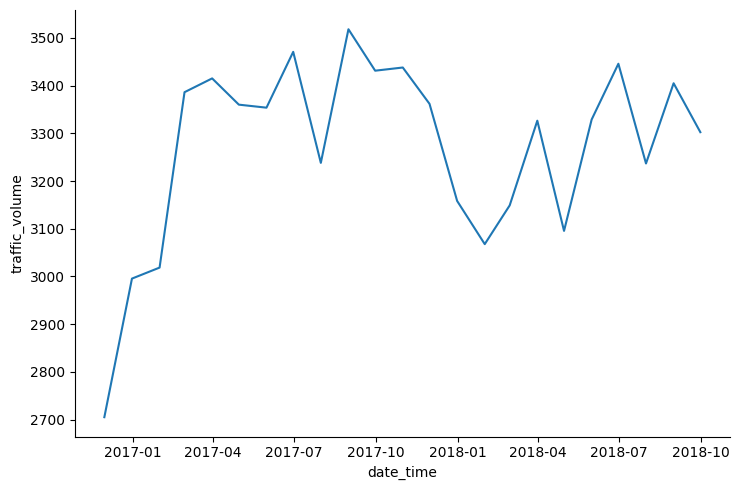

In [44]:
# or here where i can simply use the seaborn for the replot
sns.relplot(
  data=df_monthly,
  x=df_monthly.index,   # x-axis (date_time column)
  y='traffic_volume', # y-axis
  kind='line',        # using timeseries just make sense with a linechart
  height=5,
  aspect=1.5,
)

## Feature Engineering

### Instructions:
  
- **Shift Method**: Use the `shift` method to create a new column `prev_traffic_volume`, which represents the previous day's traffic volume.

- **Difference between traffic_volume**: Calculate the difference between the values in `traffic_volume` column to highlight short-term volume.

- **Date Features**: Extract meaningful time-based features from the `date_time` column to enhance the model's ability to detect temporal patterns. These features include:
  - **Day of the week**: To capture weekly seasonality.
  - **Month**: To capture monthly trends.
  - **Day of the year**: Useful for modeling yearly seasonality.


In [45]:
# here the shift method is to create previous day's traffic volume as i asked to from the instruction above
df['Prev_traffic_volume'] = df['traffic_volume'].shift(1)
df[['traffic_volume', 'Prev_traffic_volume']].head()

,traffic_volume,Prev_traffic_volume
7745,4872.0,NaN
4628,4872.0,4872.0
14496,4872.0,4872.0
8867,5074.0,4872.0
3867,5074.0,5074.0


In [46]:
# here just to make sure i sorted the values by timestamp
df = df.sort_values(by='date_time')

# then i checked time intervals
df['Time_Interval'] = df.date_time - df.date_time.shift(1)

# show the first 5 rows of the Time_Interval and date_time
df[['date_time', 'Time_Interval']].head()

# the table is not clear as it shows the interval times by an hour so the observation can be hard

,date_time,Time_Interval
7745,2016-11-18 15:00:00,NaT
4628,2016-11-18 15:00:00,0 days 00:00:00
14496,2016-11-18 15:00:00,0 days 00:00:00
8867,2016-11-18 16:00:00,0 days 01:00:00
3867,2016-11-18 16:00:00,0 days 00:00:00


In [47]:
# in this step i have extracted date_time based features

df['Day_of_Week'] = df['date_time'].dt.day_name()
df['Month'] = df['date_time'].dt.month
df['Day_of_Year'] = df['date_time'].dt.day_of_year
df['IsWeekend'] = (df['Day_of_Week'] == 'Saturday') | (df['Day_of_Week'] == 'Sunday')
# df['IsWeekend'] = df['Day_of_Week'].isin(['Saturday', 'Sunday']).astype(int)

In [48]:
# here i calculated the difference between the values in traffic_volume column to highlight short-term volume
df['Volume_Diff'] = df['traffic_volume'].diff()
df[['traffic_volume','Volume_Diff']].head()

,traffic_volume,Volume_Diff
7745,4872.0,NaN
4628,4872.0,0.0
14496,4872.0,0.0
8867,5074.0,202.0
3867,5074.0,0.0


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19988 entries, 7745 to 3795
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype          
---  ------               --------------  -----          
 0   traffic_volume       19988 non-null  float64        
 1   temp                 19988 non-null  float64        
 2   clouds_all           19988 non-null  int64          
 3   weather_main         19988 non-null  object         
 4   date_time            19988 non-null  datetime64[ns] 
 5   Month                19988 non-null  int32          
 6   Prev_traffic_volume  19987 non-null  float64        
 7   Time_Interval        19987 non-null  timedelta64[ns]
 8   Day_of_Week          19988 non-null  object         
 9   Day_of_Year          19988 non-null  int32          
 10  IsWeekend            19988 non-null  bool           
 11  Volume_Diff          19987 non-null  float64        
dtypes: bool(1), datetime64[ns](1), float64(4), int32(2), int64(1), object(2), tim

## Train-Test Split

Split the dataset into training and testing sets.

**Instructions:**
- Ensure the split maintains the time order of the data.
- Decide on an appropriate ratio for splitting the data.

In [50]:
df.shape

(19988, 12)

In [51]:
new_df = df.reset_index()['traffic_volume']

In [52]:
int(len(new_df) * 0.8)

15990

In [53]:
# here i start split the data into training and testing sets
train_size = int(len(new_df) * 0.8)  # the 80 percent is for training set
train_data, test_data = new_df[:train_size], new_df[train_size:]

## Feature Scaling

Apply feature scaling to the data if needed.

**Instructions:**
- Use a scaling method such as MinMaxScaler or StandardScaler.
- Ensure scaling is applied correctly to both training and testing data.

In [54]:
from sklearn.preprocessing import MinMaxScaler

# here i initialized the scaler which is MinMaxScaler
scaler = MinMaxScaler()

# then i tried to fit the scaler on the training data
scaler.fit(train_data.values.reshape(-1, 1))

# then transform the new data to ensure its reshaped to 2D
scaled_data = scaler.transform(new_df.values.reshape(-1, 1))

# then finally split the scaled data into training and testing sets
train_scaled, test_scaled = scaled_data[:train_size], scaled_data[train_size:]

In [55]:
# just displying the train_data before scalng for further exploring
train_data[:2]

,traffic_volume
0,4872.0
1,4872.0


In [56]:
# just to check the resahpe and scaling if its worked
train_scaled[:2]

array([[0.45919118],
       [0.45919118]])

## Models Selection

Choose two models for time series forecasting.

**Instructions:**
- Select two models such as ARIMA, SARIMA, RNN, LSTM, or GRU.
- Train these models and then compare their performance.

# RNN Model

In [57]:
# first i identified sequence len or the num of steps
n_past = 60

# then i prepare the sequences for RNN model - train set
X_train, y_train = [], []
for i in range(n_past, len(train_data)):
    X_train.append(train_data.values[i - n_past:i])
    y_train.append(train_data.values[i])
X_train, y_train = np.array(X_train), np.array(y_train)

# same thing for the test set
X_test, y_test = [], []
for i in range(n_past, len(test_data)):
    X_test.append(test_data.values[i - n_past:i])
    y_test.append(test_data.values[i])
X_test, y_test = np.array(X_test), np.array(y_test)

In [58]:
print("Train set size:")
print(X_train.shape), print(y_train.shape)

Train set size:
(15930, 60)
(15930,)


(None, None)

In [59]:
print("Test set size:")
print(X_test.shape), print(y_test.shape)

Test set size:
(3938, 60)
(3938,)


(None, None)

In [60]:
# reshaping input data
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

### Model 1 Training

Train your first model on the training dataset.

**Instructions:**
- Fit the first model to the training data.
- Ensure to monitor the training process.

In [61]:
# making sure all libraries needed are imported
import keras
from keras.models import Sequential
from keras import layers
from keras.layers import SimpleRNN, Dense, Dropout, GRU, LSTM
from keras.callbacks import EarlyStopping

# the initialize of the sequential model
model = Sequential([
    layers.Input(shape=(X_train.shape[1], X_train.shape[2])),

    # 1st layer
    SimpleRNN(units=50, return_sequences=True),
    Dropout(0.2), # drop out is used to prevent the overfitting

    # 2nd layer
    SimpleRNN(units=50, return_sequences=True),
    Dropout(0.2),

    # 3rd layer
    SimpleRNN(units=50),
    Dropout(0.2),

    # Output layer
    Dense(units=1)
])


In [62]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)               │ (None, 60, 50)              │           2,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 60, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_1 (SimpleRNN)             │ (None, 60, 50)              │           5,050 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 60, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_2 (SimpleRNN)             │ (None, 50)                  │           5,050 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 12,751 (49.81 KB)

 Trainable params: 12,751 (49.81 KB)

 Non-trainable params: 0 (0.00 B)

In [63]:
model.compile(loss='mean_squared_error', optimizer='adam')

In [64]:
# here i added the early stopping to minimize the loss
early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)

# Training the RNN model with the callbacks
model.fit(X_train, y_train,
          validation_data=(X_test, y_test),
          epochs=5,
          batch_size=10,
          verbose=1,
          callbacks= [early_stopping])

Epoch 1/5
1593/1593 ━━━━━━━━━━━━━━━━━━━━ 38s 19ms/step - loss: 14363582.0000 - val_loss: 14370012.0000
Epoch 2/5
1593/1593 ━━━━━━━━━━━━━━━━━━━━ 28s 17ms/step - loss: 13635536.0000 - val_loss: 13869146.0000
Epoch 3/5
1593/1593 ━━━━━━━━━━━━━━━━━━━━ 40s 17ms/step - loss: 13494287.0000 - val_loss: 13386321.0000
Epoch 4/5
1593/1593 ━━━━━━━━━━━━━━━━━━━━ 41s 17ms/step - loss: 12827589.0000 - val_loss: 12914621.0000
Epoch 5/5
1593/1593 ━━━━━━━━━━━━━━━━━━━━ 41s 17ms/step - loss: 12480708.0000 - val_loss: 12455971.0000


### Make 1 Predictions

Generate predictions on the test dataset.

### Instructions:
- Use the trained model to make predictions on the test data.
- Store the predictions for further analysis.

In [65]:
# the prediction
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

498/498 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step


In [66]:
model.predict(X_test[:10])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step


array([[396.934],
       [396.934],
       [396.934],
       [396.934],
       [396.934],
       [396.934],
       [396.934],
       [396.934],
       [396.934],
       [396.934]], dtype=float32)

### Model 1 Evaluation

Evaluate the performance of your first model on the test dataset.

**Instructions:**
- Calculate evaluation metrics such as MAE, MSE, RMSE, or MAPE.
- Plot the predicted vs actual values for the test set.
- Plot the loss and the validation loss.

In [67]:
# turn it back to original form
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

In [68]:
import math

# calculatin the RMSE for the train data
print(math.sqrt(mean_squared_error(y_train,train_predict)))

# calculating the RSME for the test data
print(math.sqrt(mean_squared_error(y_test,test_predict)))


4110621.8845529603
4110548.1392168757


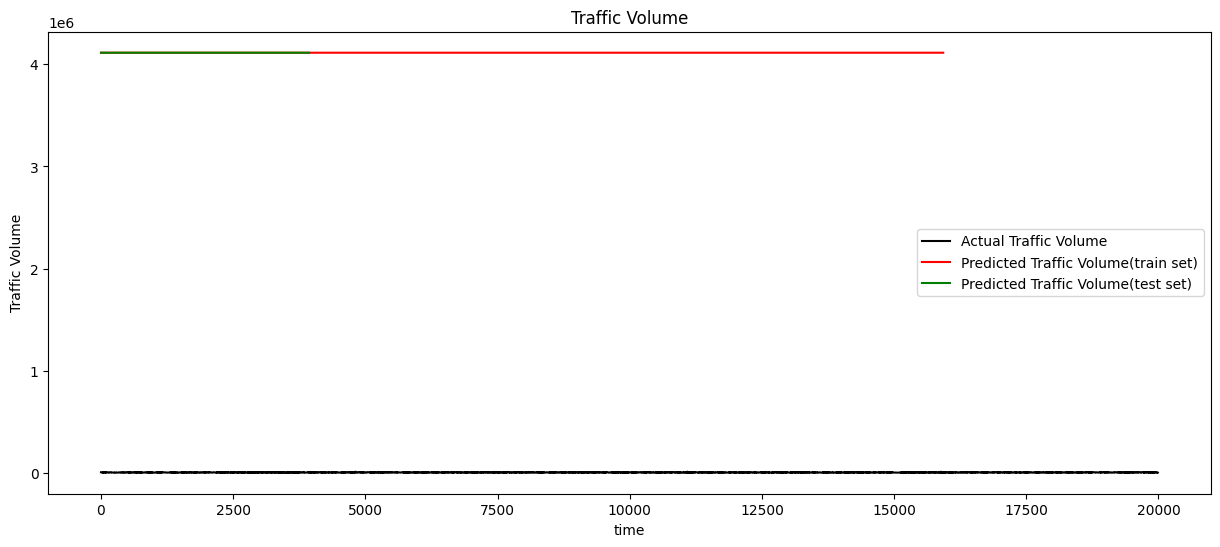

In [69]:
# Plotting the baseline data, training predictions, and test predictions
plt.figure(figsize=(15, 6))
plt.plot(
    new_df,
    color='black',
    label=f"Actual Traffic Volume")

plt.plot(
    train_predict.flatten(),
    color='red',
    label=f"Predicted Traffic Volume(train set)")

plt.plot(
    test_predict.flatten(),
    color='green',
    label=f"Predicted Traffic Volume(test set)")

plt.title("Traffic Volume")
plt.xlabel("time")
plt.ylabel("Traffic Volume")
plt.legend()
plt.show()

### Model 2 Training

Train your second model on the training dataset.

**Instructions:**
- Fit the second model to the training data.
- Ensure to monitor the training process.

# GRU Model

In [70]:
# import necessary libraries fo the GRU Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Dropout
from tensorflow.keras.optimizers import SGD
from sklearn.metrics import mean_squared_error

In [71]:
# i had a problem with generate nad fit the GRU model in the regular way so i:
# start by define GRU architacture
def gru_model(input_shape):
    model = Sequential()

    # 1st Layer
    model.add(GRU(units=50, return_sequences=True, input_shape=input_shape, activation='tanh'))
    model.add(Dropout(0.2)) # dropout regularization to prevent overfitting

    # 2nd Layer
    model.add(GRU(units=50, return_sequences=True, activation='tanh'))
    model.add(Dropout(0.2))

    # 3rd Layer
    model.add(GRU(units=50, activation='tanh'))
    model.add(Dropout(0.2))

    # Output Layer
    model.add(Dense(units=1))


    model.compile(optimizer=SGD(learning_rate=0.01, decay=1e-7, momentum=0.9, nesterov=False), loss='mean_squared_error')

    return model

In [72]:
# here im trying to fit the GRU model to the train data
def train_gru_model(X_train, y_train, epochs=10, batch_size=50):
    model = gru_model((X_train.shape[1], 1))
    model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size)
    return model

In [73]:
# main execution
if __name__ == "__main__":
    # training the GRU model
    regressorGRU = train_gru_model(X_train, y_train)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/optimizers/base_optimizer.py:33: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


319/319 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - loss: 5226846.5000
Epoch 2/10
319/319 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - loss: 4748782.0000
Epoch 3/10
319/319 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - loss: 4285585.0000
Epoch 4/10
319/319 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - loss: 4556797.0000
Epoch 5/10
319/319 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - loss: 4266868.0000
Epoch 6/10
319/319 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - loss: 4722985.0000
Epoch 7/10
319/319 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 4683331.0000
Epoch 8/10
319/319 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 4537947.0000
Epoch 9/10
319/319 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - loss: 4401518.5000
Epoch 10/10
319/319 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - loss: 4602450.5000


### Make 2 Predictions

Generate predictions on the test dataset.

### Instructions:
- Use the trained model to make predictions on the test data.
- Store the predictions for further analysis.

In [74]:
# preparing the test data for prediction
def prepare_test_data(inputs, n_steps=60):
    X_test = []
    for i in range(n_steps, len(inputs)):
        X_test.append(inputs[i-n_steps:i, 0])
    X_test = np.array(X_test)
    return np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [75]:
# gnerating predictions on the test set
def generate_predictions(model, inputs, scaler):
    inputs = inputs[len(inputs) - len(test_data) - 60:].reshape(-1, 1)
    inputs = scaler.transform(inputs)
    X_test = prepare_test_data(inputs)
    predictions = model.predict(X_test)
    return scaler.inverse_transform(predictions)

In [76]:
# plot the predictions
def plot_predictions(test, predicted):
    plt.figure(figsize=(15, 6))
    plt.plot(test, color='red', label='Real Trffic Volume')
    plt.plot(predicted, color='blue', label='Predicted Traffic Volume')
    plt.title('Traffic Volume Prediction')
    plt.xlabel('Time')
    plt.ylabel('Traffic Volume')
    plt.legend()
    plt.show()

In [77]:
# predictions
GRU_pred = generate_predictions(regressorGRU, new_df.values, scaler)

125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


### Model 2 Evaluation

Evaluate the performance of your second model on the test dataset.

**Instructions:**
- Calculate evaluation metrics such as MAE, MSE, RMSE, or MAPE.
- Plot the predicted vs actual values for the test set.
- Plot the loss and the validation loss.

In [78]:
# calculate RMSE
def calculate_rmse(test, predicted):
    rmse = math.sqrt(mean_squared_error(test, predicted))
    print("The RMSE is {}.".format(rmse))

In [79]:
print(test_data.head())
print('\n')
print(type(test_data))

15990     639.0
15991     494.0
15992     477.0
15993     806.0
15994    1430.0
Name: traffic_volume, dtype: float64


<class 'pandas.core.series.Series'>


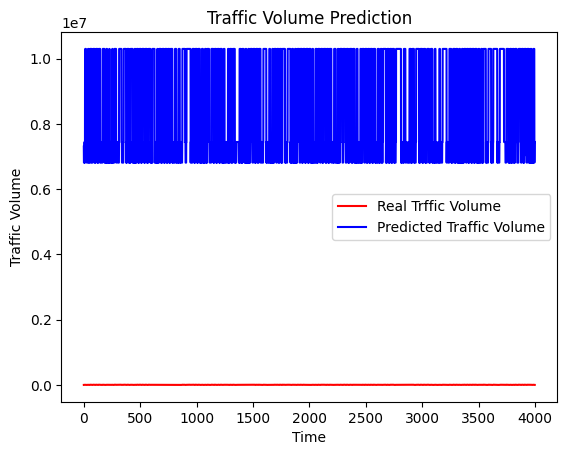

In [80]:
plot_predictions(test_data.values, GRU_pred)

## Project Questions:

1. **Data Preprocessing**: Explain why you chose your specific data preprocessing techniques (e.g., normalization, handling missing values). How did these techniques help prepare the data for training the model?
2. **Feature Engineering**: Did you perform any feature engineering or transformations? Describe your decisions and how these new features (or transformed features) contributed to the forecasting model.
3. **Model Architecture**: Describe the reasoning behind your model’s architecture (e.g., the type of model, layers, number of neurons, and activation functions). Why did you believe this architecture was appropriate for time series forecasting?
4. **Training Process**: Discuss why you chose your batch size, number of epochs, and optimizer. How did these choices affect the training process? Did you experiment with different values, and what were the outcomes?
5. **Loss Function and Metrics**: Why did you choose the specific loss function and evaluation metrics (e.g., MAE, RMSE, MAPE)? How do they align with the objective of forecasting?
6. **Model Tuning (If Done)**: Describe any tuning you performed (e.g., hyperparameter tuning) and why you felt it was necessary. How did these adjustments improve model performance?
7. **Overfitting and Underfitting**: Analyze whether the model encountered any overfitting or underfitting during training. What strategies could you implement to mitigate these issues?
8. **Future Improvements**: Suggest potential improvements or further steps you could take to enhance model performance. Consider using different algorithms, feature engineering techniques, or tuning hyperparameters.

First, when I started understanding the data and getting a sense of each column, I realized that some columns were not necessary, like the rain and snow columns, which were full with 0.0 value and would not add anything to the data or the model later on. Add to that, the weather description and main weather share the same purpose and have similar values. That explains why I dropped these columns instead of dealing with them.


### Data Preprocessing
1. **Techniques**:
   - **Normalization**: I used MinMaxScaler to scale the features to a range of 0 and 1. This is helpful for models like RNNs that are sensitive to input scales.
   - **Handling Missing Values**: I employed forward fill `ffill` to handle missing values by propagating the last valid observation to next valid, ensuring continuity in the time series data.
   - **Outlier Treatment**: Outliers in `traffic_volume` were capped using the (IQR) method to maintain data integrity. The reason behind using it, is that we only have one columns with messing values which is Traffic Volume with 20 missing values. considering the low missing value and time series.

2. **Impact**:
   - the normalization helped the model work faster during training.
   - and handling missing values and outliers ensured that the model was trained on clean data, which is needed for accurate predictions.



### Feature Engineering
1. **Transformations**:
   - Created lag features like `Prev_traffic_volume` to allow the model to learn from previous time steps
   - Extracted date-based features: Day of the week, Month...

2. **Contribution**:
   - these engineered features enhanced the model's ability to capture patterns and dependencies which will to improved forecasting accuracy.

### Model Architecture
1. **Models**:
   - Chose a Simple RNN with 3 layers and each having 50 neurons plus the dropout layers to prevent overfitting

2. **Appropriateness for Time Series**:
   - RNNs works well for time series forecasting due to their ability to maintain state information across time steps

### Training Process
1. **Batch and Epochs**:
   - I selected a batch size of 10 and trained for 5 epochs. This small batch size allowed the model to update weights more faster.
   - **Optimizer**: used Adam as its known for its effectiveness in training deep learning models.

2. **Outcomes**:
   - I monitored train and val losses and adjusting parameters which led to improved a little bit but its not the best.

### Loss Function and Metrics
1. **Metrics**:
   - i used Mean Squared Error for regression tasks like forecasting

2. **Objectives**:
   - these metrics align well with the goal of minimizing errors

### Model Tuning
1. **Hyperparameter**:
   - i chosed different numbers of layers and neurons, which is improved model performance a little
   - early stopping was implemented to prevent overfitting

### Overfitting and Underfitting
1. **Analysis**:
   - Ad to my view of point i think the model showed signs of overfitting showing by a gap between train and val loss
   - and by i applied dropout layers and early stopping to address this overfitting

### Future Improvements
1. **Potentials**:
   - maybe explore advanced architectures like LSTM which may better capture longterm dependencies
   - Try with different scaling techniques or hyperparameter optimization methods like Grid Search or Random Search.


### Answer Here: